In [35]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
from read_path_module import read_data_relative_path
from write_path_module import write_data_relative_path

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### - Read in and trim the dataset

In [88]:
df = read_data_relative_path('./data/SuperBowl/Super_Bowl_Championships.csv', data_type='csv')

col_remove = ['Game', 'Score', 'Venue', 'Venue City', 'Attendance', 'Ref']

df.drop(col_remove, axis=1, inplace=True)

df

,Date/Season,Winning team,Winning Zip,Winning County,Winning State,Winning County Code,Losing team,Losing Zip,Losing County,Losing State,Losing County Code
0,"February 3, 2002 (2001)",New England PatriotsA,2201,SUFFOLK,MASSACHUSETTS,25025,St. Louis RamsN,63101,Saint Louis City,Missouri,29510
1,"January 26, 2003 (2002)",Tampa Bay BuccaneersN,33602,HILLSBOROUGH,FLORIDA,12057,Oakland RaidersA,94612,ALAMEDA,CALIFORNIA,6001
2,"February 1, 2004 (2003)",New England PatriotsA,2201,SUFFOLK,MASSACHUSETTS,25025,Carolina PanthersN,28202,MECKLENBURG,NORTH CAROLINA,37119
3,"February 6, 2005 (2004)",New England PatriotsA,2201,SUFFOLK,MASSACHUSETTS,25025,Philadelphia EaglesN,19102,PHILADELPHIA,PENNSYLVANIA,42101
4,"February 5, 2006 (2005)",Pittsburgh SteelersA,15222,ALLEGHENY,PENNSYLVANIA,42003,Seattle SeahawksN,98101,KING,WASHINGTON,53033
5,"February 4, 2007 (2006)",Indianapolis ColtsA,46202,MARION,INDIANA,18097,Chicago BearsN,60605,COOK,ILLINOIS,17031
6,"February 3, 2008 (2007)",New York GiantsN,10002,NEW YORK,NEW YORK,36061,New England PatriotsA,2201,SUFFOLK,MASSACHUSETTS,25025
7,"February 1, 2009 (2008)",Pittsburgh SteelersA,15222,ALLEGHENY,PENNSYLVANIA,42003,Arizona CardinalsN,85003,MARICOPA,ARIZONA,4013
8,"February 7, 2010 (2009)",New Orleans SaintsN,70195,ORLEANS,LOUISIANA,22071,Indianapolis ColtsA,46202,MARION,INDIANA,18097
9,"February 6, 2011 (2010)",Green Bay PackersN,54311,BROWN,WISCONSIN,55009,Pittsburgh SteelersA,15222,ALLEGHENY,PENNSYLVANIA,42003


### - Clean dataset, create datetime column, and calculate hypothesized birth date

In [16]:
# Lower case all string columns
for col in df.columns.to_list():
    if not str(df[col][0]).isnumeric():
        df[col] = df[col].str.lower()

# Remove N and A characters at end of team names        
df['Winning team'] = df['Winning team'].str[:-1]
df['Losing team'] = df['Losing team'].str[:-1]


df[['Month', 'Day', 'Year']] = df['Date/Season'].str.split(' ', expand = True)
df['Day'] = df['Day'].str.split(',', n=1, expand = True)
df['Year'] = df['Year'].str.split('\xa0', n=1, expand = True)

df['Superbowl Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str), format='%Y-%B-%d')

df.rename(columns={"Year": "Superbowl Year", "Month": "Superbowl Month", "Day": "Superbowl Day"}, inplace=True)

df['Superbowl Birth Date'] = df['Superbowl Date'] + pd.Timedelta(38, unit='W')

df['Superbowl Birth Year'] = pd.DatetimeIndex(df['Superbowl Birth Date']).year

df['Superbowl Birth Month'] = pd.DatetimeIndex(df['Superbowl Birth Date']).month_name()

df['Superbowl Birth Day'] = pd.DatetimeIndex(df['Superbowl Birth Date']).day


df = df[['Superbowl Date',
        'Superbowl Birth Date',
        'Superbowl Year',
        'Superbowl Birth Year',
        'Superbowl Month',
        'Superbowl Birth Month',
        'Superbowl Day',
        'Superbowl Birth Day',
        'Winning County Code',
        'Losing County Code']]

df.head(2)

,Superbowl Date,Superbowl Birth Date,Superbowl Year,Superbowl Birth Year,Superbowl Month,Superbowl Birth Month,Superbowl Day,Superbowl Birth Day,Winning County Code,Losing County Code
0,2002-02-03,2002-10-27,2002,2002,february,October,3,27,25025,29510
1,2003-01-26,2003-10-19,2003,2003,january,October,26,19,12057,6001


### - Import CDC Natality data and find data for a super bowl winner county

In [17]:
df_CDC = read_data_relative_path('./data/CDC_Natality/2003_2018.csv', data_type='csv')
df_CDC['Birth Date'] = pd.to_datetime(df_CDC['Birth Date'])
df_CDC['Conception Date'] = pd.to_datetime(df_CDC['Conception Date']).dt.normalize()
df_CDC['Conception Date Standard'] = pd.to_datetime(df_CDC['Conception Date']).dt.normalize()
df_CDC.sample(2)

,Birth Year,Conception Year,Conception Year Standard,Birth Month,Conception Month,Conception Month Standard,Birth Month Code,Conception Month Code,Conception Month Code Standard,Birth Date,...,Conception Date Standard,State,State Acronym,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age,Notes
105733,2018,2017,2017,January,May,April,1,5,4,2018-01-15,...,2017-05-04,Indiana,IN,18,Allen County,18003,428.0,27.45,38.45,NaN
40099,2008,2008,2008,November,March,February,11,3,2,2008-11-15,...,2008-03-03,California,CA,6,Stanislaus County,6099,642.0,26.93,38.64,NaN


In [80]:
def t_score(df_CDC, County_Code, Birth_Year, Birth_Month, time='month'):
    
    if time == 'month':
        lst_births_null = df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'] == Birth_Month) & (df_CDC['Birth Year'] != Birth_Year)]['Births'].values.tolist()
    elif time == '3_month':
        lst_births_null = df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'].isin([Birth_Month-1,Birth_Month, Birth_Month+1])) & (df_CDC['Birth Year'] != Birth_Year)]['Births'].values.tolist()
    else:
        return print('put in month or 3_month for time')
    
    lst_births_alt = df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'] == Birth_Month) & (df_CDC['Birth Year'] == Birth_Year)]['Births'].values.tolist()
    
    x_bar = lst_births_alt[0]
    mu = np.average(lst_births_null)
    S = statistics.stdev(lst_births_null)
    n = len(lst_births_null)
    
    t_score = (x_bar - mu) / (S)
    
    return round(t_score,3)

In [82]:
t_score(df_CDC, County_Code=12057, Birth_Year=2003, Birth_Month=10, time='3_month')

-0.424

In [86]:
def t_score_data(df_CDC, County_Code, Birth_Year, Birth_Month, time='3_month'):
    
    if time == 'month':
        lst_births_null = df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'] == Birth_Month) & (df_CDC['Birth Year'] != Birth_Year)]['Births'].values.tolist()
    elif time == '3_month':
        lst_births_null = df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'].isin([Birth_Month-1,Birth_Month, Birth_Month+1])) & (df_CDC['Birth Year'] != Birth_Year)]['Births'].values.tolist()
    else:
        return print('put in month or 3_month for time')
    
    lst_births_alt = df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'] == Birth_Month) & (df_CDC['Birth Year'] == Birth_Year)]['Births'].values.tolist()
    
    return lst_births_null + lst_births_alt

[1394.0, 1403.0, 1377.0, 1530.0, 1382.0, 1465.0, 1580.0, 1577.0, 1518.0, 1522.0, 1565.0, 1562.0, 1461.0, 1532.0, 1396.0, 1450.0, 1405.0, 1307.0, 1479.0, 1515.0, 1390.0, 1455.0, 1435.0, 1412.0, 1434.0, 1482.0, 1357.0, 1436.0, 1432.0, 1424.0, 1470.0, 1477.0, 1351.0, 1519.0, 1483.0, 1485.0, 1517.0, 1442.0, 1510.0, 1421.0, 1565.0, 1484.0, 1419.0, 1540.0, 1422.0, 1434.0]


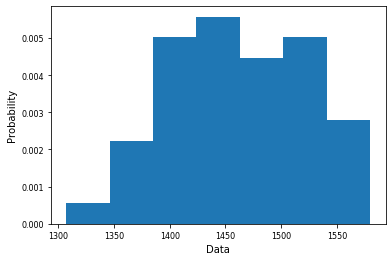

In [87]:
x = t_score_data(df_CDC, County_Code=12057, Birth_Year=2003, Birth_Month=10)

print(x)

plt.hist(x, density=True, bins=7)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [26]:
# Super bowl birth date: 2003-10-19
# County of winners: 12057
cc = 12057

df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'] == 10) & (df_CDC['Birth Year'] != 2003)]['Births'].values.tolist()
df_CDC.loc[(df_CDC['County Code'] == cc) & (df_CDC['Birth Month Code'] == 10) & (df_CDC['Birth Year'] == 2003)]['Births'].values.tolist()

[1403.0,
 1382.0,
 1577.0,
 1565.0,
 1532.0,
 1405.0,
 1515.0,
 1435.0,
 1482.0,
 1432.0,
 1477.0,
 1483.0,
 1442.0,
 1565.0,
 1540.0]

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 